### Project 7
#### Bambee Garfield
#### CSIS 44-613 Data Analytics Fundamentals
#### Task 3

##### 10.16
##### Fahrenheit to Celsius

In [122]:
c = lambda f: 5 / 9 * (f - 32) 
temps = [(f, c(f)) for f in range(0, 101, 10)]

##### Linear Relationships

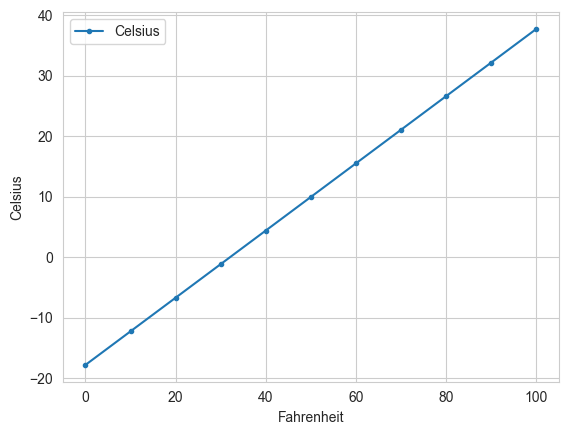

In [123]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

##### Getting data from NOAA

In [124]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

##### Loading Avg High Temps into DataFrame

In [125]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [126]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


##### Cleaning the Data

In [127]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [128]:
nyc.Date.dtype

dtype('int64')

In [129]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Calculating Basic Descriptive Statistics

In [130]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

##### Forecasting Future January Avg High Temps

In [131]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [132]:
linear_regression.slope

0.014771361132966163

In [133]:
linear_regression.slope

0.014771361132966163

In [134]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [135]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

##### Plotting Avg High Temp and a Regression Line

(10.0, 70.0)

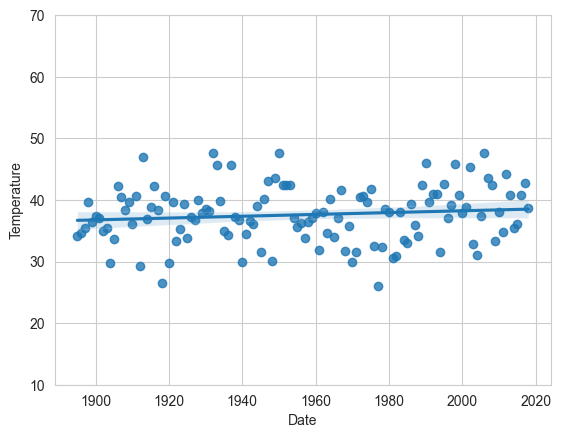

In [136]:
import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

#### 15.4
##### Loading Avg High Temp into DataFrame

In [137]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Splitting Data for Training and Testing

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [139]:
X_train.shape

(93, 1)

In [140]:
X_test.shape

(31, 1)

##### Training the Model

In [141]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [142]:
linear_regression.coef_

array([0.01939167])

In [143]:
linear_regression.intercept_

-0.30779820252656975

##### Testing the Model

In [144]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


##### Predicting Future Temps & Estimating Past Temps

In [145]:
predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [146]:
predict(1890)

array([36.34246432])

##### Visualizing the Dataset with the Regression Line

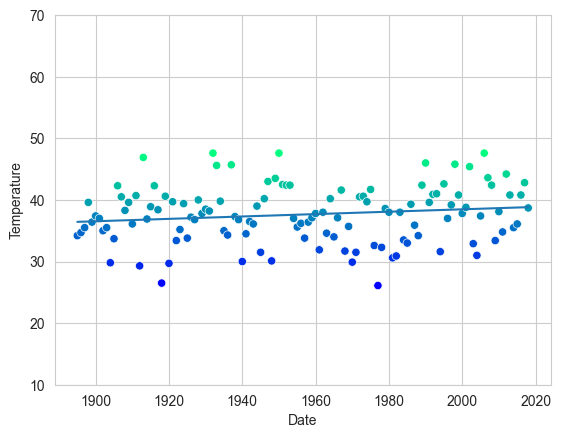

In [147]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)